# VISUALIZATION

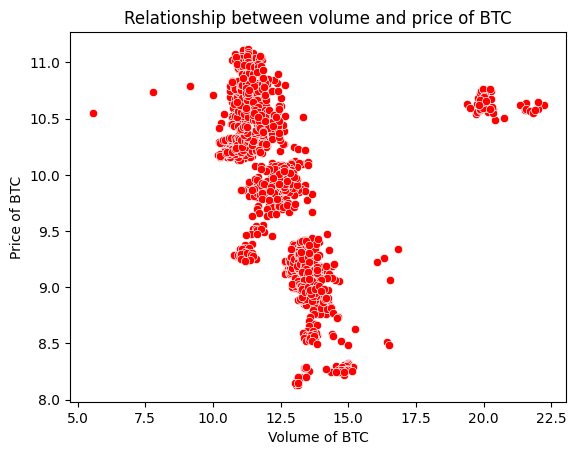

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bitcoin = pd.read_csv('../data/cleaned_bitcoin.csv', index_col = 0)
bitcoin['bitcoin_price'] = bitcoin['bitcoin_price'].str.replace(',', '').astype(float)

bitcoin['log_price'] = np.log(bitcoin['bitcoin_price'])
bitcoin['log_vol'] = np.log(bitcoin['bitcoin_vol.'])

g = sns.scatterplot(x='log_vol',
                y='log_price',
                data=bitcoin,
                color='red')
g.set_title('Relationship between volume and price of BTC')
g.set(xlabel='Volume of BTC',
    ylabel='Price of BTC')
plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

bitcoin = pd.read_csv("../data/cleaned_bitcoin.csv")

In [11]:
#bitcoin['bitcoin_price'] = bitcoin['bitcoin_price'].str.replace(',', '').astype(float)
bitcoin['MA_30'] = bitcoin['bitcoin_price'].rolling(30).mean()
bitcoin= bitcoin.dropna()
print(bitcoin['MA_30'].isna())


29      False
30      False
31      False
32      False
33      False
        ...  
1238    False
1239    False
1240    False
1241    False
1242    False
Name: MA_30, Length: 1214, dtype: bool


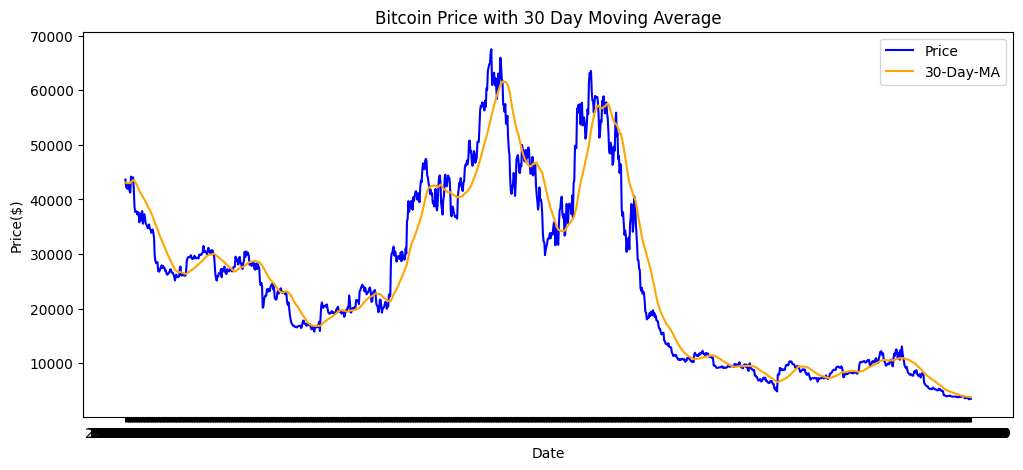

In [12]:
plt.figure(figsize=(12, 5,))
sns.lineplot(data=bitcoin,
             x='date',
             y='bitcoin_price',
             label ='Price',
             color='blue')
sns.lineplot(data=bitcoin,
             x='date',
             y='MA_30',
             label='30-Day-MA',
             color ='orange')
plt.title("Bitcoin Price with 30 Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price($)")
plt.legend()

plt.show()

## Histogram of Daily Return

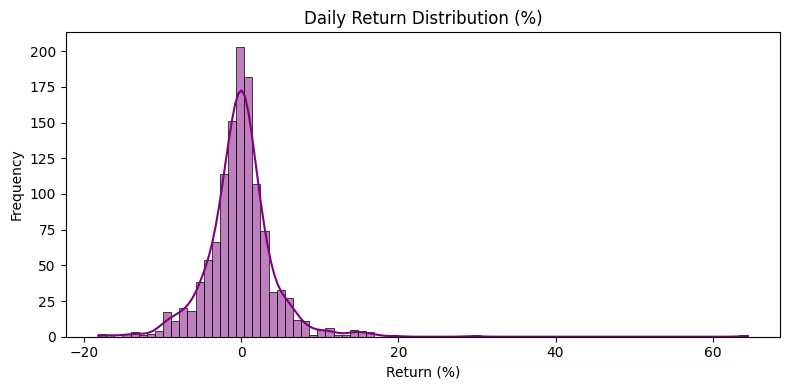

In [14]:
bitcoin['daily_return(%)'] = bitcoin['bitcoin_price'].pct_change() *100

plt.figure(figsize=(8, 4,))
sns.histplot(bitcoin['daily_return(%)'].dropna(), bins =80, color ='purple', kde = True)
plt.title("Daily Return Distribution (%)")
plt.xlabel('Return (%)')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Monthly Average Heatmap

In [17]:
bitcoin['date'] = pd.to_datetime(bitcoin["date"], errors= "coerce")
bitcoin = bitcoin.dropna(subset=['date'])
print(bitcoin.head())

         date  bitcoin_price  bitcoin_vol.         MA_30  daily_return(%)
29 2023-12-20        43662.8       70190.0  43078.163333              NaN
30 2023-12-19        42259.3       55290.0  43046.983333        -3.214407
31 2023-12-18        42659.7       61580.0  43032.926667         0.947484
32 2023-12-15        41929.0       45280.0  43011.210000        -1.712858
33 2023-12-14        43025.9       59150.0  43013.866667         2.616089


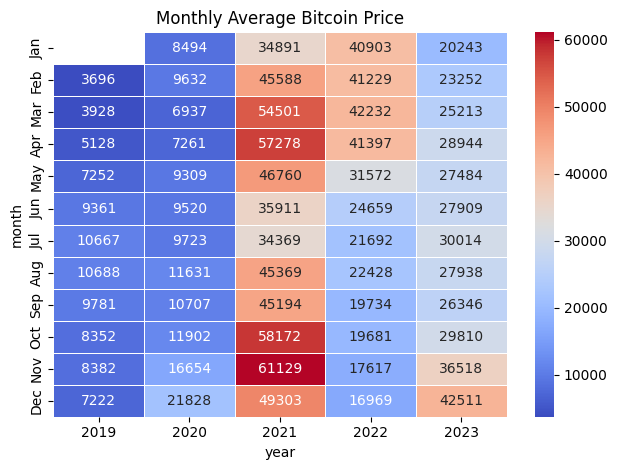

In [18]:
bitcoin['year'] = bitcoin['date'].dt.year
bitcoin['month'] = bitcoin['date'].dt.strftime('%b')

heatmap_data = bitcoin.pivot_table(index='month', columns='year', values='bitcoin_price', aggfunc='mean')
heatmap_data = heatmap_data.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.Figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)
plt.title("Monthly Average Bitcoin Price")
plt.tight_layout()

plt.show()

## Bitcoin Price vs Volume (Dual Axis)

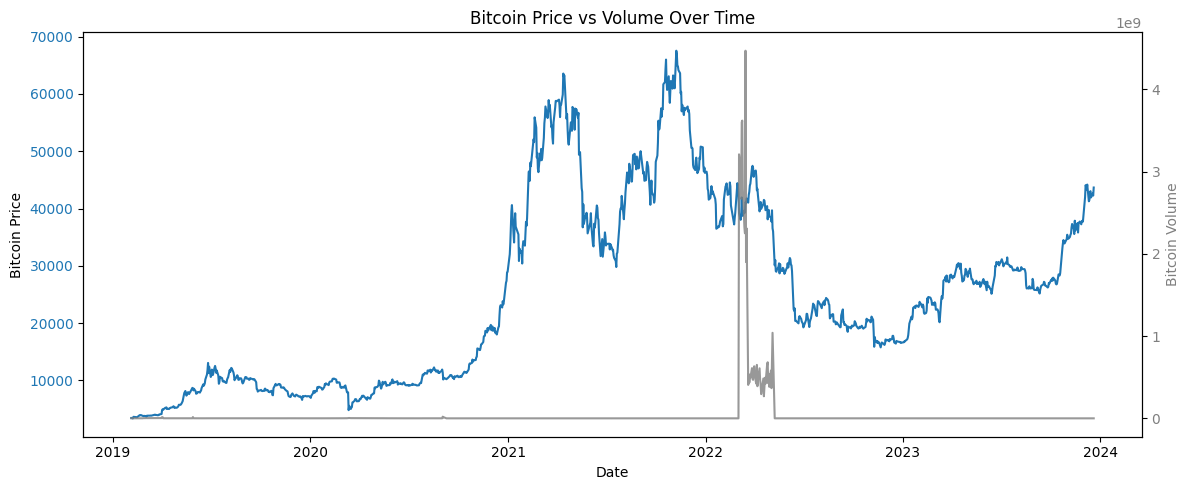

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 5))

color1 = 'tab:blue'
ax1.set_xlabel("Date")
ax1.set_ylabel("Bitcoin Price")
ax1.plot(bitcoin['date'], bitcoin['bitcoin_price'], color=color1, label = 'Price')
ax1.tick_params(axis ='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:gray'
ax2.set_ylabel('Bitcoin Volume', color = color2)
ax2.plot(bitcoin['date'], bitcoin['bitcoin_vol.'], color =color2, label = 'BTC volume', alpha =0.8)
ax2.tick_params(axis ="y", labelcolor =color2)

plt.title('Bitcoin Price vs Volume Over Time')
fig.tight_layout()

plt.show()

## Highlighting Peak Bitcoin Price

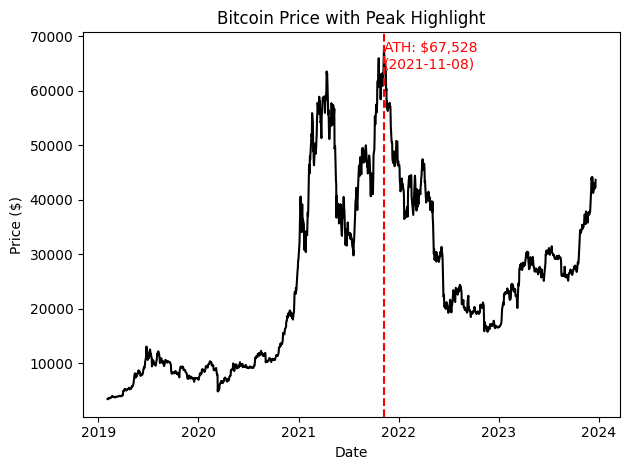

In [22]:
max_idx = bitcoin['bitcoin_price'].idxmax()
max_date = bitcoin.loc[max_idx, 'date']
max_price = bitcoin.loc[max_idx, 'bitcoin_price']

plt.Figure(figsize=(12, 5))
sns.lineplot(data = bitcoin,
             x ='date',
             y='bitcoin_price',
             color = 'black')
plt.axvline(max_date, color = 'red', linestyle ='--')
plt.text(max_date, max_price*0.95, f'ATH: ${max_price:,.0f}\n({max_date.date()})',
         color ='red', fontsize =10, ha='left')

plt.title("Bitcoin Price with Peak Highlight")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.tight_layout()

plt.show()